In [1]:
!pip install asgl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.0 MB 8.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.5 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 61.9 MB/s eta 0:00:01
  Created wheel for asgl: filename=asgl-1.0.5-py3-none-any.whl size=16022 sha256=3dafbb811cbf0229a394f0642161127cc707db473626d34f46fe44a39f8dc2a8
  Stored in directory: /home/romain/.cache/pip/wheels/d6/26/09/40a8a96f5ab2796fd359dd0e473c6067b1a6fafaa1f65612a2
  Created wheel for cvxpy: filename=cvxpy-1.1.7-cp37-cp37m-linux_x86_64.whl size=3688674 sha256=079dd1017ffe7914ad224a34ab222342397446f1154e3277eb019a5d514cdb70
  Stored in directory: /home/romain/.cache/pip/wheels/81/ed/d2/8891a926e137c9bdb228e79cc3600e8dd3597

In [1]:
import asgl
import nibabel as nib
import numpy as np
import os
import pandas as pd 
import glob
from sklearn.linear_model import LinearRegression
from scipy import stats
import plotnine as p9
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import statsmodels.api as sm
from scipy import stats
import import_ipynb
from Predistim_Library import *
import sklearn.preprocessing as skl_pp#import StandardScalerndardScaler
import heapq
import scipy# import stats

importing Jupyter notebook from Predistim_Library.ipynb


In [2]:
np.set_printoptions(precision=3)
df1 = pd.read_excel(os.path.join(STUDY_PATH,'Analyse_Imagerie_Predistim_V4_20210208.xlsx'),engine='openpyxl',index_col=0)
df1.rename(columns={'MoCA_TOT _V0':'MoCA_TOT_V0'},inplace=True)
#df2 = pd.read_excel(os.path.join(STUDY_PATH,'Bio_Ima_Gen_V5_20210210.xlsx'),engine='openpyxl',index_col=0)
df2 = pd.read_excel(os.path.join(STUDY_PATH,'Bio_Ima_Gen_V3_20210205.xlsx'),engine='openpyxl',index_col=0)
df3 = pd.read_excel(os.path.join(STUDY_PATH,'FOG_ThomasO_20210205.xlsx'),engine='openpyxl',index_col=0,converters={'PatientNB':str})
df3 = df3.dropna(subset={'FOGQ4 V0','FOGQ4 V1'})['Différence FOGQ somme V0-V1 gravité']

2023-04-06 17:24:55,032 - INFO - NumExpr defaulting to 8 threads.


In [3]:
df=df1.join(df2['R2_Median_Ventricules'])
for cpt in df.index:
    df.loc[cpt,'PatientNB']=cpt[:-2]+'AA'
FOG_DB=df.join(df3,on='PatientNB').dropna(subset={'Différence FOGQ somme V0-V1 gravité'})
FOG_DB=FOG_DB.drop('PatientNB',axis=1)

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,428.0,6.010280e+01,7.421640e+00,3.000000e+01,5.500000e+01,6.200000e+01,6.600000e+01,7.300000e+01
DIS_DUR_DIAG_V0,426.0,9.544601e+00,3.893782e+00,2.000000e+00,7.000000e+00,9.000000e+00,1.175000e+01,3.200000e+01
BMI,389.0,2.478429e+01,4.002659e+00,1.562262e+01,2.209317e+01,2.456747e+01,2.728175e+01,4.191434e+01
Sexe,428.0,1.348131e+00,4.769352e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Centre,428.0,9.165888e+00,5.861641e+00,1.000000e+00,6.000000e+00,7.000000e+00,1.700000e+01,1.900000e+01
UPDRS_III_WOFF_V0,410.0,4.171463e+01,1.674048e+01,7.000000e+00,2.900000e+01,3.900000e+01,5.100000e+01,1.260000e+02
DOPA_SEN_V0,409.0,7.444303e+01,1.429321e+01,1.250000e+01,6.520000e+01,7.690000e+01,8.480000e+01,1.000000e+02
UPDRS_TOT_OFF_V0,409.0,7.823472e+01,2.667513e+01,1.900000e+01,6.000000e+01,7.400000e+01,9.400000e+01,1.660000e+02
HY_OFF_V0,405.0,2.606173e+00,8.702090e-01,1.000000e+00,2.000000e+00,2.500000e+00,3.000000e+00,5.000000e+00
UPDRS_I _V0,406.0,1.182512e+01,5.455676e+00,0.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01,3.200000e+01


In [9]:
## Réunion Biomarker 24/06
df = pd.read_excel(os.path.join(STUDY_PATH,'20210621_QSM_Values.xlsx'),index_col=0,engine='openpyxl')
print(df.columns)
print(df1.columns)

Index(['QSM_10Percentile_Ventricules', 'QSM_90Percentile_Ventricules',
       'QSM_Energy_Ventricules', 'QSM_Entropy_Ventricules',
       'QSM_InterquartileRange_Ventricules', 'QSM_Kurtosis_Ventricules',
       'QSM_Median_Ventricules', 'QSM_Minimum_Ventricules',
       'QSM_Range_Ventricules', 'QSM_RootMeanSquared_Ventricules',
       ...
       'QSM_MaximumProbability_MP2RAGE_STR', 'QSM_SumSquares_MP2RAGE_STR',
       'QSM_Idn_MP2RAGE_STR', 'QSM_DifferenceEntropy_MP2RAGE_STR',
       'QSM_DifferenceVariance_MP2RAGE_STR', 'QSM_SumAverage_MP2RAGE_STR',
       'QSM_Idmn_MP2RAGE_STR', 'QSM_Id_MP2RAGE_STR', 'QSM_volume_MP2RAGE_STR',
       'QSM_Maximum_MP2RAGE_STR'],
      dtype='object', length=544)
Index(['Age', 'DIS_DUR_DIAG_V0', 'BMI', 'Sexe', 'Centre', 'UPDRS_III_WOFF_V0',
       'DOPA_SEN_V0', 'UPDRS_TOT_OFF_V0', 'HY_OFF_V0', 'UPDRS_I _V0',
       'UPDRS_II_OFF_V0', 'UPDRS_II_ON_V0', 'UPDRS_III_BON_V0', 'UPDRS_IV _V0',
       'UPDRS_TOT_ON_V0', 'HY_ON_V0', 'SE_ON_V0', 'SE_OFF_V0', '

In [104]:
filter_col=[col for col in df_tmp if col.startswith('QSM_Variance')]
print(filter_col)

['QSM_Variance_Ventricules', 'QSM_Variance_Caudate', 'QSM_Variance_Putamen', 'QSM_Variance_Thalamus', 'QSM_Variance_Globus_pallidus', 'QSM_Variance_Hippocampus', 'QSM_Variance_Amigdala', 'QSM_Variance_CingulaireAnt', 'QSM_Variance_FrontalSup', 'QSM_Variance_Ventricule', 'QSM_Variance_WM', 'QSM_Variance_FLASH_RN', 'QSM_Variance_FLASH_SN', 'QSM_Variance_QSM_GPe', 'QSM_Variance_QSM_GPi', 'QSM_Variance_FLASH_STh', 'QSM_Variance_MP2RAGE_STR']


In [91]:
df_tmp=df.merge(df1,on="PatientID")

In [92]:
print(np.mean(df_tmp.query('MoCA_TOT_V0>=26')['QSM_Median_Thalamus'].dropna()))
print(np.mean(df_tmp.query('MoCA_TOT_V0<26')['QSM_Median_Thalamus'].dropna()))

0.04239938380761342
0.04219175366645072


In [106]:
from scipy import stats

print(np.mean(df_tmp.query('MoCA_TOT_V0>=26')['QSM_Variance_FLASH_SN']),np.std(df_tmp.query('MoCA_TOT_V0>=26')['QSM_Variance_FLASH_SN']))
print(np.mean(df_tmp.query('MoCA_TOT_V0<26')['QSM_Variance_FLASH_SN']),np.std(df_tmp.query('MoCA_TOT_V0<26')['QSM_Variance_FLASH_SN']))
stats.ttest_ind(df_tmp.query('MoCA_TOT_V0>=26')['QSM_Variance_FLASH_SN'], df_tmp.query('MoCA_TOT_V0<26')['QSM_Variance_FLASH_SN'])

0.00010811233843554643 0.0001852438888946002
0.00011486874898776245 0.00010980107165305795


Ttest_indResult(statistic=-0.3054752156347388, pvalue=0.7602486650748753)

,QSM_10Percentile_Ventricules,QSM_90Percentile_Ventricules,QSM_Energy_Ventricules,QSM_Entropy_Ventricules,QSM_InterquartileRange_Ventricules,QSM_Kurtosis_Ventricules,QSM_Median_Ventricules,QSM_Minimum_Ventricules,QSM_Range_Ventricules,QSM_RootMeanSquared_Ventricules,...,R2_Kurtosis_SN,R2_Median_SN,R2_Skewness_SN,R2_10Percentile_GPi,R2_90Percentile_GPi,R2_Energy_GPi,R2_Entropy_GPi,R2_Kurtosis_GPi,R2_Median_GPi,R2_Skewness_GPi
PatientID,,,,,,,,,,,,,,,,,,,,,
01011BB,0.026502,0.056802,133.497719,5.775933,0.016328,2.927790,0.041493,0.011673,0.087981,0.043228,...,3.004391,32.264800,0.121135,26.567365,35.741019,410551.177038,6.199649,2.290510,30.778397,0.292510
01014DE,0.035995,0.102172,32.874565,6.167647,0.034029,3.049697,0.060434,0.015151,0.131468,0.069423,...,3.433953,39.850113,0.464523,28.185468,39.391553,471381.346590,6.282444,2.035381,34.838986,-0.214367
01015HC,0.035626,0.086757,44.750692,6.134374,0.027749,2.936618,0.057983,0.015191,0.107199,0.062668,...,11.756815,44.641121,2.524403,33.249256,53.253778,986762.658024,3.155403,156.221819,43.158627,10.782792
01016BP,0.036021,0.102120,35.717481,6.196290,0.033865,3.031557,0.057546,0.016264,0.126302,0.068365,...,6.331066,41.169532,1.541826,27.030587,45.550892,555330.781613,5.765076,4.249590,36.446709,0.665707
01017TA,0.027271,0.072288,67.340910,6.096195,0.025263,3.485355,0.044580,0.016350,0.097776,0.051157,...,5.897222,42.711978,1.513237,31.221478,37.610038,484753.847529,5.989164,2.931311,34.403759,-0.013892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048EC,0.038916,0.102945,33.858408,6.415770,0.040795,1.900333,0.063544,0.021792,0.101475,0.071842,...,2.723541,36.862015,0.368592,28.983270,38.465002,659727.482203,2.696319,224.117408,32.000403,13.346924
19049DM,0.034624,0.069868,171.329716,5.812987,0.019519,3.229856,0.052479,0.020167,0.099347,0.054307,...,32.866110,49.821489,4.327717,30.855887,41.586128,620067.781200,6.154992,2.657657,35.828490,0.261511
19050PM,0.037810,0.083180,106.254357,5.976405,0.023153,4.212832,0.054961,0.019340,0.112334,0.061270,...,5.010685,45.512080,1.225533,29.895650,50.693532,765601.765560,5.681802,4.792076,37.585336,1.191026


/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /NAS/deathrow/protocoles/predistim/screenshots/abs_sm6_MoCA_TOT_V0_R2_Energy_Putamen.jpg
/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /NAS/deathrow/protocoles/predistim/screenshots/abs_sm6_MoCA_TOT_V0_R2_Energy_Caudate.jpg
/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /NAS/deathrow/protocoles/predistim/screenshots/abs_sm6_MoCA_TOT_V0_QSM_Energy_Putamen.jpg
/home/romain/.local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning

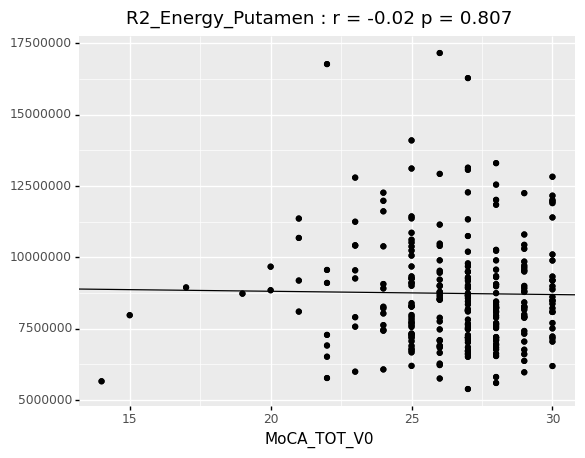

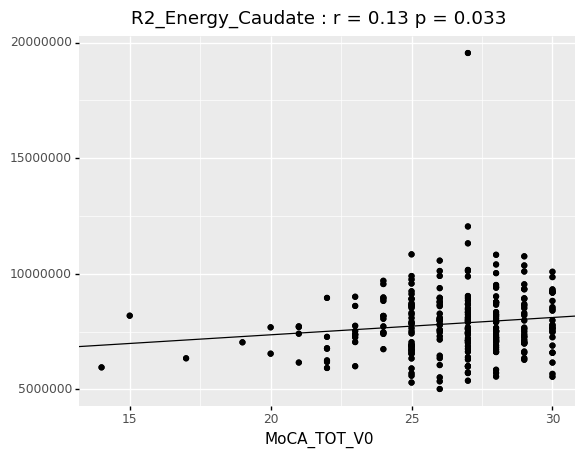

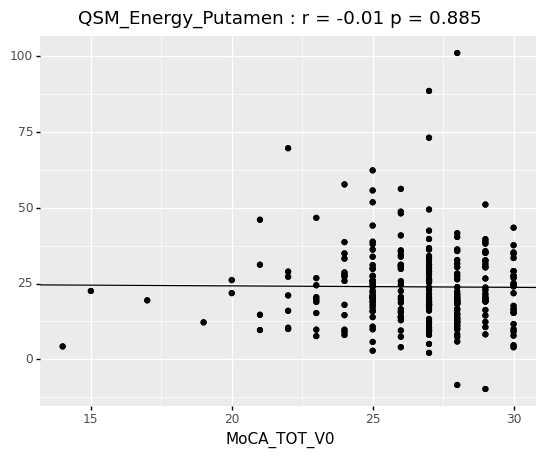

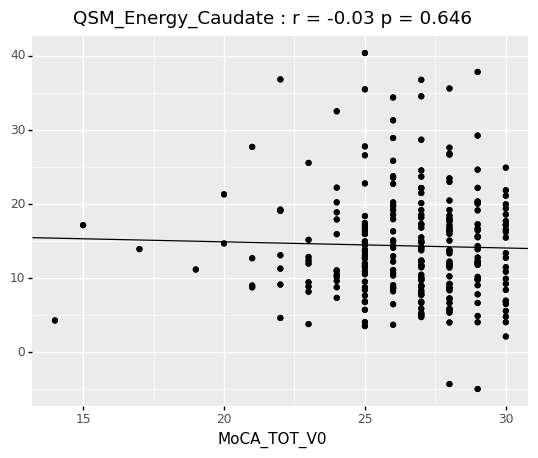

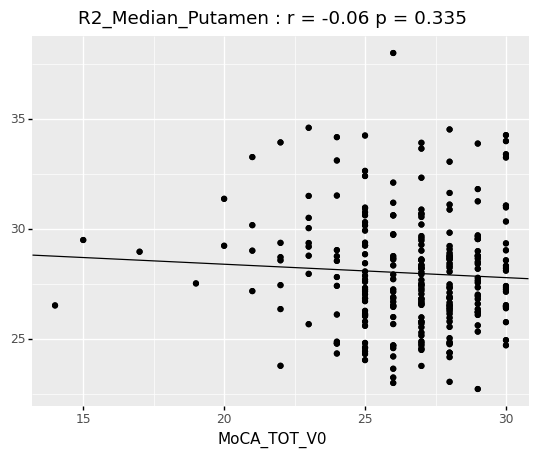

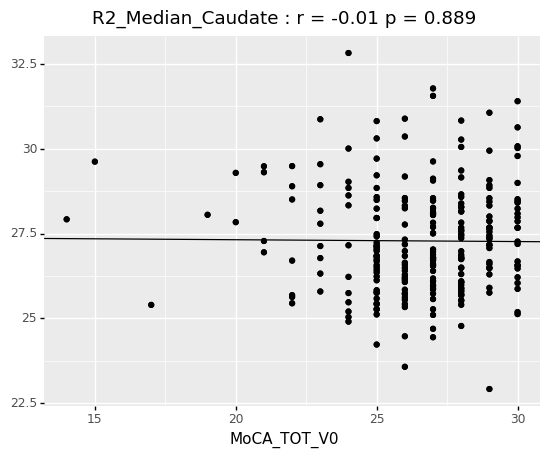

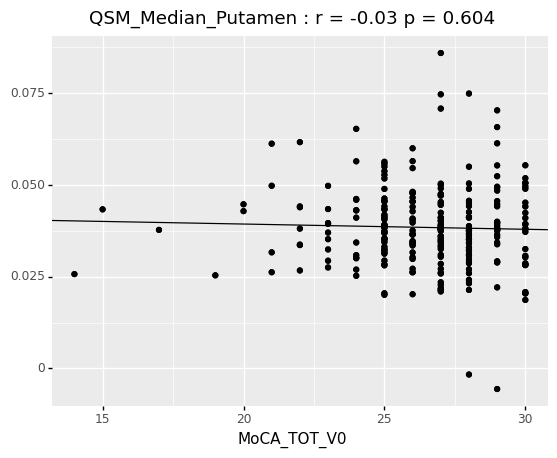

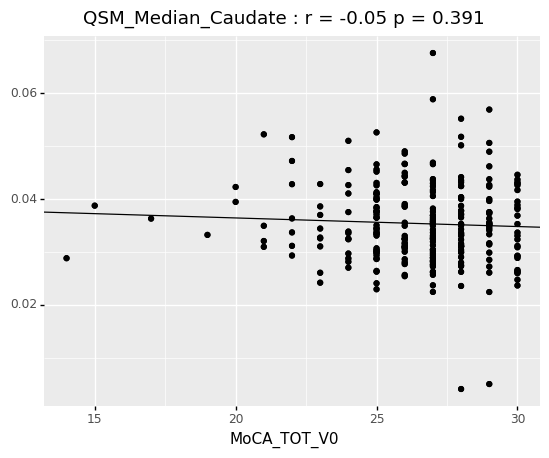

In [126]:
for cov in ['MoCA_TOT_V0']:
    for struct in ["R2_Energy_Putamen","R2_Energy_Caudate","QSM_Energy_Putamen","QSM_Energy_Caudate","R2_Median_Putamen","R2_Median_Caudate","QSM_Median_Putamen","QSM_Median_Caudate"]:#["QSM_Median_Amigdala","QSM_Median_Putamen","QSM_Median_FLASH_SN","QSM_Median_FLASH_RN","QSM_Median_Globus_pallidus","QSM_Median_Hippocampus","QSM_Median_Thalamus"]:
        
        df_exclud=df_tmp.query('R2_Energy_Putamen<20000000')
        X=df_exclud.dropna(axis=0,how='any',subset={cov,struct},inplace=False)[cov].values
        Y=df_exclud.dropna(axis=0,how='any',subset={cov,struct},inplace=False)[struct].values
        EV=df_exclud.dropna(axis=0,how='any',subset={cov,struct},inplace=False)['Age'].values
        Y_corr=unconfound(Y.reshape(-1, 1),EV.reshape(-1, 1),False)

        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, Y_corr[:,0])
        plot=p9.qplot(X,Y_corr[:,0])\
            +p9.geom_point()\
            +p9.xlab(cov)+p9.ggtitle(str(struct)+' : r = '+str(r_value.round(2))+' p = '+str(p_value.round(3)))\
            +p9.geom_abline(intercept=intercept,slope=slope)
        plot.draw()
        plot.save(os.path.join(STUDY_PATH,'screenshots',"abs_sm6_"+cov+'_'+struct+'.jpg'))

In [5]:
for col in FOG_DB.columns [21:]:
    if col.startswith('R2_'):        
        #print(col)
        FOG_DB[col]=FOG_DB[col]/FOG_DB['R2_Median_Ventricules']

In [6]:
FOG_corr=FOG_DB.corr()
FOG_corr['Différence FOGQ somme V0-V1 gravité']

Age                                   -0.015834
DIS_DUR_DIAG_V0                        0.242302
BMI                                   -0.040965
Sexe                                   0.002748
Centre                                 0.241976
UPDRS_III_WOFF_V0                      0.050614
DOPA_SEN_V0                           -0.020286
UPDRS_TOT_OFF_V0                       0.084288
HY_OFF_V0                              0.213986
UPDRS_I _V0                            0.001283
UPDRS_II_OFF_V0                        0.109969
UPDRS_II_ON_V0                         0.065176
UPDRS_III_BON_V0                       0.030664
UPDRS_IV _V0                           0.119811
UPDRS_TOT_ON_V0                        0.058944
HY_ON_V0                              -0.147865
SE_ON_V0                              -0.004286
SE_OFF_V0                             -0.043750
MoCA_TOT _V0                          -0.001524
PDQ39_TOT_V0                           0.220465
LEDD _TOT _V0                          0

In [7]:
FOG_DB.groupby(['Centre'])['R2_Median_Putamen'].describe()

,count,mean,std,min,25%,50%,75%,max
Centre,,,,,,,,
1,18.0,1.618526,0.192509,1.011282,1.583922,1.636555,1.706401,1.941076
2,24.0,1.341772,0.332796,0.852094,1.018980,1.454945,1.598797,2.032139
5,14.0,1.691351,0.131206,1.504319,1.576966,1.712638,1.768216,1.976582
6,44.0,1.502556,0.155126,1.204944,1.403314,1.472672,1.586247,1.842043
7,9.0,1.597459,0.086835,1.427724,1.571754,1.585342,1.671983,1.688143
8,12.0,1.597477,0.221877,1.053211,1.528492,1.607871,1.675760,1.942579
9,5.0,1.690917,0.086604,1.595833,1.623408,1.685150,1.741950,1.808241
11,12.0,1.552368,0.215967,0.945254,1.499589,1.591915,1.648917,1.836861
14,2.0,1.923535,0.373976,1.659095,1.791315,1.923535,2.055756,2.187976


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  4.,  0.,
         2.,  4.,  3.,  4.,  4.,  2.,  3., 10.,  5., 14., 16., 13., 18.,
        16., 24., 24., 20., 38., 21., 32., 30., 33., 35., 39., 49., 39.,
        35., 42., 37., 31., 34., 23., 30., 20., 10.,  6.,  9.]),
 array([ 12.5 ,  14.25,  16.  ,  17.75,  19.5 ,  21.25,  23.  ,  24.75,
         26.5 ,  28.25,  30.  ,  31.75,  33.5 ,  35.25,  37.  ,  38.75,
         40.5 ,  42.25,  44.  ,  45.75,  47.5 ,  49.25,  51.  ,  52.75,
         54.5 ,  56.25,  58.  ,  59.75,  61.5 ,  63.25,  65.  ,  66.75,
         68.5 ,  70.25,  72.  ,  73.75,  75.5 ,  77.25,  79.  ,  80.75,
         82.5 ,  84.25,  86.  ,  87.75,  89.5 ,  91.25,  93.  ,  94.75,
         96.5 ,  98.25, 100.  ]),
 <BarContainer object of 50 artists>)

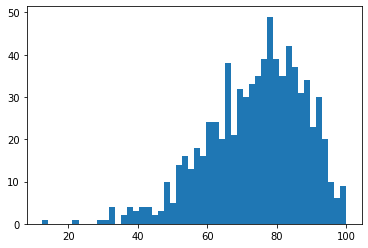

In [50]:
plt.hist(df['DOPA_SEN_V0'],bins=50)

In [9]:
FOG_DB['R2_Median_Putamen'].mean()+2*FOG_DB['R2_Median_Putamen'].std()

2.0000159107284303

In [18]:
liste_struct=['R2_Median_Putamen']
#liste_struct=['Caudate_L', 'Caudate_R', 'Putamen_L', 'Putamen_R', 'Thalamus_L', 'Thalamus_R', 'Glob_Pallidus_L', 'Glob_Pallidus_R', 'Hipocampus_L', 'Hipocampus_R', 'Amigdala_L', 'Amigdala_R','RedNucleus_L', 'RedNucleus_R', 'SubstantiaNegra_L', 'SubstantiaNegra_R', 'GPe_L', 'GPe_R', 'GPi_L', 'GPi_R', 'Striatum_L', 'Striatum_R']
for struct in liste_struct: 
    group='factor(Centre)'
    plot=p9.ggplot(FOG_DB,p9.aes(x=group, y=struct)) + p9.geom_violin(draw_quantiles=[0.25,0.5,0.75])+p9.geom_boxplot(width=.1)
    plot.draw()

/home/romain/.local/lib/python3.7/site-packages/plotnine/stats/stat_density.py:152: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/home/romain/.local/lib/python3.7/site-packages/plotnine/stats/stat_density.py:154: PlotnineWarning: Groups with fewer than 2 data points have been removed.


KeyError: 'x'

0.0008858108044413151 1.5456527580494603 0.041977181322217186 0.5580861005038422 0.0015098278258381535


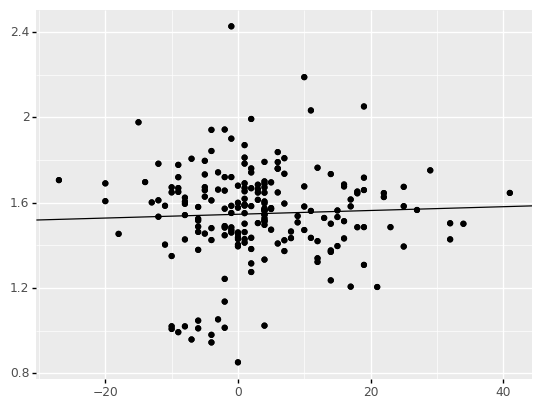

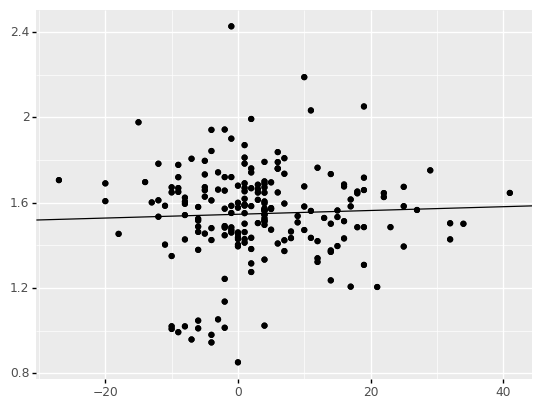

In [11]:
cov='Différence FOGQ somme V0-V1 gravité'
struct='R2_Median_Putamen'
X=FOG_DB.dropna(axis=0,how='any',subset={cov,struct},inplace=False)[cov].values
Y=FOG_DB.dropna(axis=0,how='any',subset={cov,struct},inplace=False)[struct].values
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X,Y)
print(slope, intercept, r_value, p_value, std_err)
plot=p9.qplot(X,Y)\
    +p9.geom_point()\
    +p9.geom_abline(intercept=intercept,slope=slope)
plot.draw()

In [13]:
#listCols=df.columns[0:5].tolist()
#listCols=listCols+df.columns[6:33].tolist()
vectData=np.arange(0,33)
vectData=np.delete(vectData,[0,1,2,5])
listCols=df.columns[vectData].tolist()
for col in df.columns:
    if col.find("CingulaireAnt")>0:
        listCols.append(col)
    elif col.find("FrontalSup")>0:
        listCols.append(col)        
    elif col.startswith("QSM_"):
        listCols.append(col)
print(len(listCols))
print(type(listCols))
#print(listCols)

29
<class 'list'>


In [10]:
listPara=(['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range',
    'original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_Uniformity','original_firstorder_Variance','original_glcm_Autocorrelation',
    'original_glcm_ClusterProminence','original_glcm_Contrast','original_glcm_Correlation','original_glcm_InverseVariance','original_glcm_JointAverage',
    'original_glcm_JointEnergy','original_glcm_JointEntropy','original_glcm_MCC','original_glcm_MaximumProbability','original_glcm_SumSquares'])
len(listPara)

24

In [11]:
list_oar=["Ventricules","Caudate","Putamen","Thalamus","Globus_pallidus","Hippocampus","Amigdala",'FLASH_RN','FLASH_SN','QSM_GPe','QSM_GPi','FLASH_STh','MP2RAGE_STR','CingulaireAnt','FrontalSup']                            
len(list_oar)

15

In [12]:
df_reduced = df.query('CQT1>1 and CQTE>1').drop(listCols,axis='columns').dropna()

UndefinedVariableError: name 'CQT1' is not defined

In [17]:
print(df.query('CQT1>1 and CQTE>1').drop(listCols,axis='columns').isnull().sum(axis=0).to_string())

Age                                          3
DIS_DUR_DIAG_V0                              0
BMI                                         39
UPDRS_III_WOFF_V0                           20
CQTE                                         0
3DT1_10Percentile_Ventricules                0
3DT1_90Percentile_Ventricules                0
3DT1_Energy_Ventricules                      0
3DT1_Entropy_Ventricules                     0
3DT1_InterquartileRange_Ventricules          0
3DT1_Kurtosis_Ventricules                    0
3DT1_Median_Ventricules                      0
3DT1_Minimum_Ventricules                     0
3DT1_Range_Ventricules                       0
3DT1_RootMeanSquared_Ventricules             0
3DT1_Skewness_Ventricules                    0
3DT1_Uniformity_Ventricules                  0
3DT1_Variance_Ventricules                    0
3DT1_Autocorrelation_Ventricules             0
3DT1_ClusterProminence_Ventricules           0
3DT1_Contrast_Ventricules                    0
3DT1_Correlat

In [18]:
print(df.query('CQT1>1 and CQTE>1').drop(listCols,axis='columns').isnull().sum(axis=1).to_string())

PatientID
01011BB    144
01014DE    144
01015HC    144
01016BP    144
01017TA    144
01018MT    144
01019LJ    144
01020VM    144
01023CF    144
01024FC    144
01025RE    144
01026AF    144
01027TM    144
01028SA    144
01029LL    144
01030DM    144
01031FB      1
01034UG    144
01035RM    145
01037DA    145
01038PG    144
01039AC    145
01040LC    145
01044SD    145
01045TP    144
01046AA    144
01048LJ    145
01050ME    145
01059MV      0
01060PC      0
01061CD      0
02003SJ    360
02004GB    360
02006DP    360
02007ST    360
02009LP    360
02011BH    360
02012HX    360
02014BP    360
02015DP    360
02017VL    360
02018RM    456
02020BD    360
02021HR    360
02024JP    360
02025CP    360
02027SJ    360
02028FO    360
02029DS    360
02030DM    360
02034PF    360
02036RJ    360
02038DM    361
02040DC    360
02041BJ    360
02046CA    360
02053MC    456
02054DB    456
02059WC    360
02063VC    360
02064CA    360
02065GJ    360
02067BE    360
02068AM    360
02069VF    456
02070DJ    360


In [12]:
data_scaler = skl_pp.StandardScaler().fit(FOG_DB.loc[:,FOG_DB.columns.str.startswith('R2')].values)
data_rescaled = data_scaler.transform(FOG_DB.loc[:,FOG_DB.columns.str.startswith('R2')].values)

#print ("\ndata:\n", x[0:5,:])
#print ("\nRescaled data:\n", data_rescaled[0:5,:])

#y=df.query('CQT1>1 and CQTE>1').drop(listCols,axis='columns').dropna().iloc[:,0].values
#x=df.query('CQT1>1 and CQTE>1').drop(listCols,axis='columns').dropna().iloc[:,1:].values
index_no=FOG_DB.columns.get_loc('Différence FOGQ somme V0-V1 gravité')
index_no
y=np.transpose(FOG_DB.iloc[:,50].values)
x=data_rescaled[:,:-1]

group_index=np.ones(28)
for grp in np.arange(4):
    group_index=group_index+np.concatenate((np.zeros(28-(7*grp)),np.ones(7*grp)),axis=0)

In [298]:
y=data_rescaled[:,index_no]
x=np.delete(data_rescaled,np.s_[index_no],axis=1)

nbExogene=3
n=x.shape[1]-nbExogene
group_index=np.ones(n)
for grp in np.arange(26):
    group_index=group_index+np.concatenate((np.zeros(n-(24*grp)),np.ones(24*grp)),axis=0)
#print(group_index)
#print(len(group_index))

group_index=np.insert(group_index,0,np.ones(nbExogene)*(np.max(group_index)+1))
print(y.shape,x.shape,group_index.shape)

IndexError: index 50 is out of bounds for axis 1 with size 50

In [16]:
# Define parameters grid
lambda1 = (10.0 ** np.arange(-3,3.01, 0.2)) # 23 possible values for lambda
#alpha = np.arange(0, 1, 0.05) # 20 possible values for alpha
alpha=np.r_[np.arange(0.0, 0.3, 0.02), np.arange(0.3, 0.7, 0.1), np.arange(0.7, 0.99, 0.02)]

# Define model parameters
model = 'lm'  # linear model
penalization = 'sgl'  # sparse group lasso penalization
parallel = True # Code executed in parallel
error_type = 'QRE'  # Error measuremente considered. MSE stands for Mean Squared Error. #MAE MDAE QRE

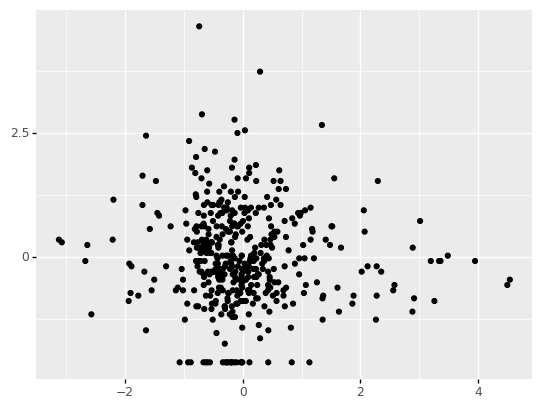

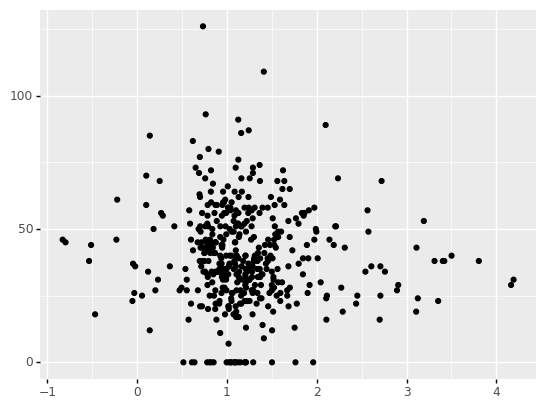

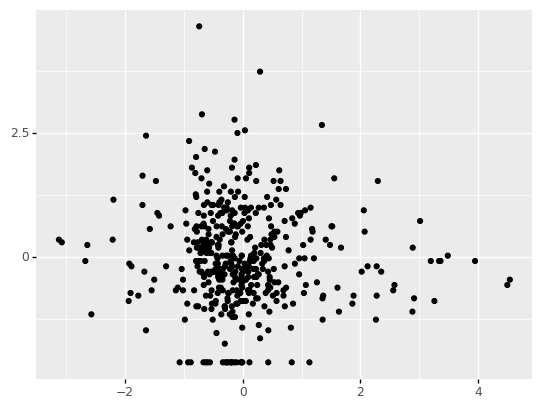

In [31]:
plot=p9.qplot(x[:,10],y)
plot.draw()
plot=p9.qplot(data_rescaled[:,11],data_rescaled[:,0])
plot.draw()

### Optimisation Lambda et alpha

In [14]:
# Define a cross validation object
cv_class = asgl.CV(model=model,penalization=penalization,lambda1=lambda1, alpha=alpha,nfolds=5, error_type=error_type, parallel=parallel, random_state=99)
                   
# Compute error using k-fold cross validation
error = cv_class.cross_validation(x=x, y=y, group_index=group_index)

# Obtain the mean error across different folds
error = np.mean(error, axis=1)

# Select the minimum error
minimum_error_idx = np.argmin(error)

# Select the parameters associated to mininum error values
optimal_parameters = cv_class.retrieve_parameters_value(minimum_error_idx)
optimal_lambda = optimal_parameters.get('lambda1')
optimal_alpha = optimal_parameters.get('alpha')

/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

In [15]:
print(f' Minimum cross validation error was {error[minimum_error_idx]}.\n Optimal parameter values:\n  Lambda: {optimal_lambda}\n  Alpha: {optimal_alpha}')
len(error)
np.arange(0,len(error))

 Minimum cross validation error was 4.067266414027847.
 Optimal parameter values:
  Lambda: 6.309573444801981
  Alpha: 0.0


array([   0,    1,    2, ..., 1051, 1052, 1053])

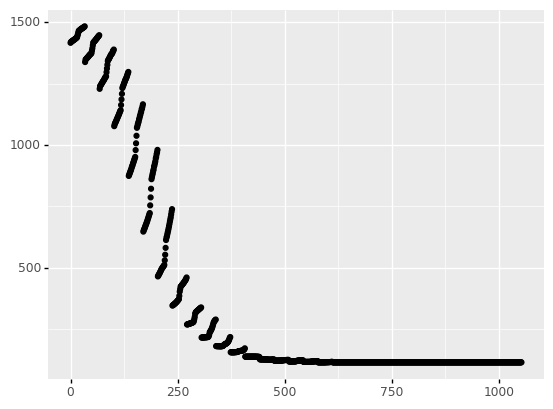

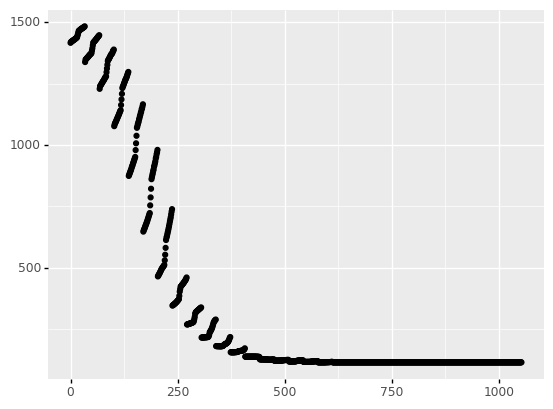

In [46]:
plot=p9.qplot(np.arange(0,len(error)),error)
plot.draw()

### test du lambda et alpha sur mon jeu de données

In [47]:
# Define asgl class using optimal values
asgl_model = asgl.ASGL(model=model, penalization=penalization, lambda1=optimal_lambda, alpha=optimal_alpha)

# Split data into train / test
train_idx, test_idx = asgl.train_test_split(nrows=x.shape[0], train_pct=0.7, random_state=1)

# Solve the model
asgl_model.fit(x=x[train_idx, :], y=y[train_idx], group_index=group_index)

# Obtain betas
final_beta_solution = asgl_model.coef_[0]

# Obtain predictions
final_prediction = asgl_model.predict(x_new=x[test_idx, :])

# Obtain final errors
final_error = asgl.error_calculator(y_true=y[test_idx], prediction_list=final_prediction, error_type=error_type)

In [48]:
print(final_error,x.shape,final_beta_solution.shape)

[122.53406475897926] (197, 28) (29,)


In [52]:
#final_beta_solution


Index(['R2_10Percentile_Caudate', 'R2_90Percentile_Caudate',
       'R2_Energy_Caudate', 'R2_Entropy_Caudate', 'R2_Kurtosis_Caudate',
       'R2_Median_Caudate', 'R2_Skewness_Caudate', 'R2_10Percentile_Putamen',
       'R2_90Percentile_Putamen', 'R2_Energy_Putamen', 'R2_Entropy_Putamen',
       'R2_Kurtosis_Putamen', 'R2_Median_Putamen', 'R2_Skewness_Putamen',
       'R2_10Percentile_SN', 'R2_90Percentile_SN', 'R2_Energy_SN',
       'R2_Entropy_SN', 'R2_Kurtosis_SN', 'R2_Median_SN', 'R2_Skewness_SN',
       'R2_10Percentile_GPi', 'R2_90Percentile_GPi', 'R2_Energy_GPi',
       'R2_Entropy_GPi', 'R2_Kurtosis_GPi', 'R2_Median_GPi', 'R2_Skewness_GPi',
       'R2_Median_Ventricules'],
      dtype='object')

In [56]:
nlargest_ind=heapq.nlargest(3, range(len(final_beta_solution)), final_beta_solution.take)
print(nlargest_ind)
nlargest_val=final_beta_solution[nlargest_ind]
print(nlargest_val)
#df.drop(listCols,axis='columns').columns[np.asarray(nlargest_ind) - 1]
FOG_DB.columns[FOG_DB.columns.str.startswith('R2')][nlargest_ind]

[0, 12, 14]
[2.766 0.128 0.038]


Index(['R2_10Percentile_Caudate', 'R2_Median_Putamen', 'R2_10Percentile_SN'], dtype='object')

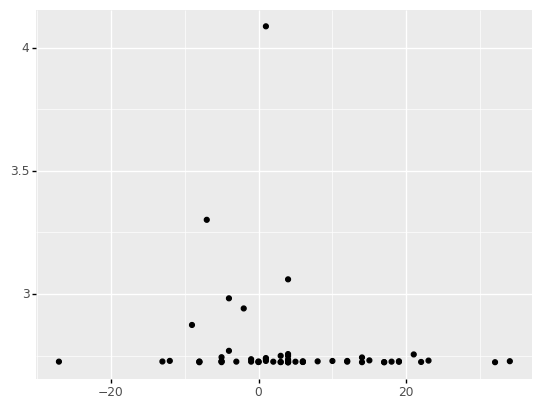

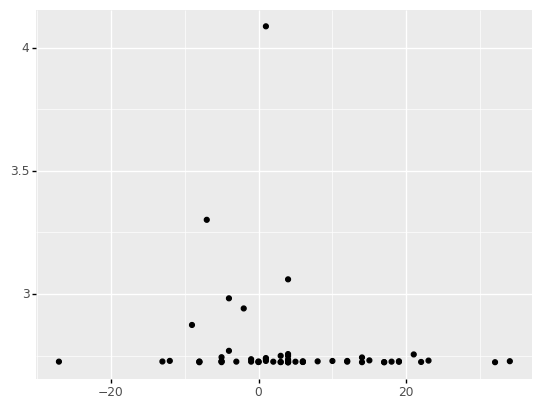

In [57]:
plot=p9.qplot(y[test_idx],final_prediction)
plot.draw()

In [58]:
final_prediction

[array([2.727, 2.723, 2.735, 2.749, 2.724, 2.725, 2.723, 2.743, 2.724,
        2.725, 2.743, 3.06 , 2.755, 2.725, 2.983, 2.769, 2.726, 2.725,
        2.731, 2.724, 2.725, 2.942, 2.726, 2.74 , 2.723, 2.723, 2.724,
        2.724, 2.723, 2.756, 2.874, 2.748, 2.724, 2.727, 2.734, 2.727,
        2.724, 2.726, 2.723, 2.725, 2.727, 2.725, 2.728, 2.725, 2.73 ,
        2.727, 2.723, 2.728, 3.301, 2.724, 2.728, 2.725, 4.087, 2.727,
        2.73 , 2.726, 2.736, 2.723, 2.729])]